<a href="https://colab.research.google.com/github/abigailsleek/TEAM-B.-TASK-5/blob/master/movies_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# section 1

> this includes importing libraries and data preparation.




In [29]:
# first off, we are going to be importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random as rd
from scipy.sparse import csr_matrix

!pip install helper
import helper

from sklearn.cluster import KMeans

next, we are going to load the dataset to pandas dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
moviesDT = pd.read_csv('/content/drive/My Drive/Member/movies - movies.csv')
moviesDT.head()

,rank,title,genre,wiki_plot,imdb_plot,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
url = 'https://raw.githubusercontent.com/driphics/TEAM-B.-TASK-5/master/movies%20-%20movies.csv'

In [31]:
moviesDT = pd.read_csv(url)

In [32]:
moviesDT.head()

,rank,title,genre,wiki_plot,imdb_plot,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


so i want to drop all these unnecessary data for simplicity and ease.

In [33]:
moviesDT.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],axis=1, inplace=True)
moviesDT.head()

,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


here, i'm going to merge the wiki_plot and the imdb_plot since they have slightly different summaries of the same movie, so i want to combine and form a single plot for easy computation.

In [34]:

moviesDT['plot'] = moviesDT['wiki_plot'].astype(str) + "\n" + \
                 moviesDT['imdb_plot'].astype(str)

moviesDT.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [35]:
# statistics of my moviesDT
moviesDT.describe()

,rank,title,genre,wiki_plot,imdb_plot,plot
count,101,101,101,101,91,102
unique,101,101,62,101,91,102
top,47,City Lights,[u' Drama'],\n\n\n\nOrson Welles as Charles Foster Kane\n\...,"Elia Kazan,who directed the Broadway play on w...","In 1280, King Edward ""Longshanks"" (Patrick Mcg..."
freq,1,1,11,1,1,1


# Pre-processing my data in Natural Languge
> this includes:



1.   Tokenization
2.   Stemming






next, i'm going to tokenize my data.
Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are dicarded. So i'm going to use the NLTK method of tokenization.



In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# Tokenize a paragraph from the wizard of oz into sentences and store in  a variable 'sent_tokenized'
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                         Dorothy and her friends are hindered and menaced by the Wicked Witch of the West.
                         She incites trees to throw apples at them, then tries to set the scarecrow on fire.
                        """)]

# Word Tokenize first sentence from sent_tokenized, save the result in a variable 'words_tokenized'
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

#I'm going to need to import a library that helps remove tokens that do not contain any letters from words_tokenized
import re

filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

# Let's observe words after tokenization
filtered

['Dorothy',
 'and',
 'her',
 'friends',
 'are',
 'hindered',
 'and',
 'menaced',
 'by',
 'the',
 'Wicked',
 'Witch',
 'of',
 'the',
 'West']

Next, i'm going to stem my already filtered data. Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix. There are several stemming models, including Porter and Snowball.

In [38]:
from nltk.stem.snowball import SnowballStemmer


In [39]:

# I want to create a SnowballStemmer object in english
stemmer = SnowballStemmer("english")

# let's observe words without stemming
print("Without stemming: ", filtered)




Without stemming:  ['Dorothy', 'and', 'her', 'friends', 'are', 'hindered', 'and', 'menaced', 'by', 'the', 'Wicked', 'Witch', 'of', 'the', 'West']


In [40]:
#  I want to Stem the words from filtered data above and store in a variable'stemmed_words'
stemmed_words = [stemmer.stem(word) for word in filtered]
# now let's check out after stemming
print("After stemming:   ", stemmed_words)

After stemming:    ['dorothi', 'and', 'her', 'friend', 'are', 'hinder', 'and', 'menac', 'by', 'the', 'wick', 'witch', 'of', 'the', 'west']


**clubbing**

so i want to wrap the tokenized and stemmed text together so that i can create a TF-IDF vector of the text. Basically clubbing just makes the work easier by merging the filtered and stem text together as one instead of creating a TF-IDF vector simultaneously for the stem and filtered text, it's done just once on the clubbed data.

In [41]:
# I am going to define a function to perform both stemming and tokenization
def tokenize_plus_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(word) for word in filtered_tokens]
    
    return stems

words_stemmed = tokenize_plus_stem("Dorothy and her friends are hindered and menaced by the Wicked Witch of the West.")
print(words_stemmed)

['dorothi', 'and', 'her', 'friend', 'are', 'hinder', 'and', 'menac', 'by', 'the', 'wick', 'witch', 'of', 'the', 'west']


#  Section 3

> this icludes the use of algorithms like:

*  ** TF-TDF VECTORIZER**





You know computers are not naturally smart except we make to,and they don't understand texts only 0's and 1's. So we are going to need to transform the texts to numbers for it to be meaningful to the computer.

TF-IDF (term frequency-inverse document frequency) is a metric that represents how 'important' a word is to a document in the document set.

In [42]:
 
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:

# Instantiate TfidfVectorizer object with stopwords and tokenizer with necessary parameters for efficient processing of text
tfidf_myobject = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_plus_stem,
                                 ngram_range=(1,3))

So right now, let's fit the text and then transform the text to produce the corresponding numeric form of the data which the computer will be able to understand and derive meaning from. To do this, use the fit_transform() method of the TfidfVectorizer object.

In [44]:
# Fit and transform the tfidf_myobject using  the "plot" of each movie
tfidf_matrix = tfidf_myobject.fit_transform([x for x in moviesDT["plot"]])

print(tfidf_matrix.shape)

(102, 535)


In [47]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans

# Create a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters=5)

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
moviesDT["cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
moviesDT['cluster'].value_counts()

1    39
0    29
2    19
3    10
4     5
Name: cluster, dtype: int64

Calculating similarity distance

In [48]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

# Import Matplotlib, Linkage, and Dendrograms

In [49]:
# Import matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt

# Configure matplotlib to display the output inline
%matplotlib inline

# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

# Create merging and plot dendrogram

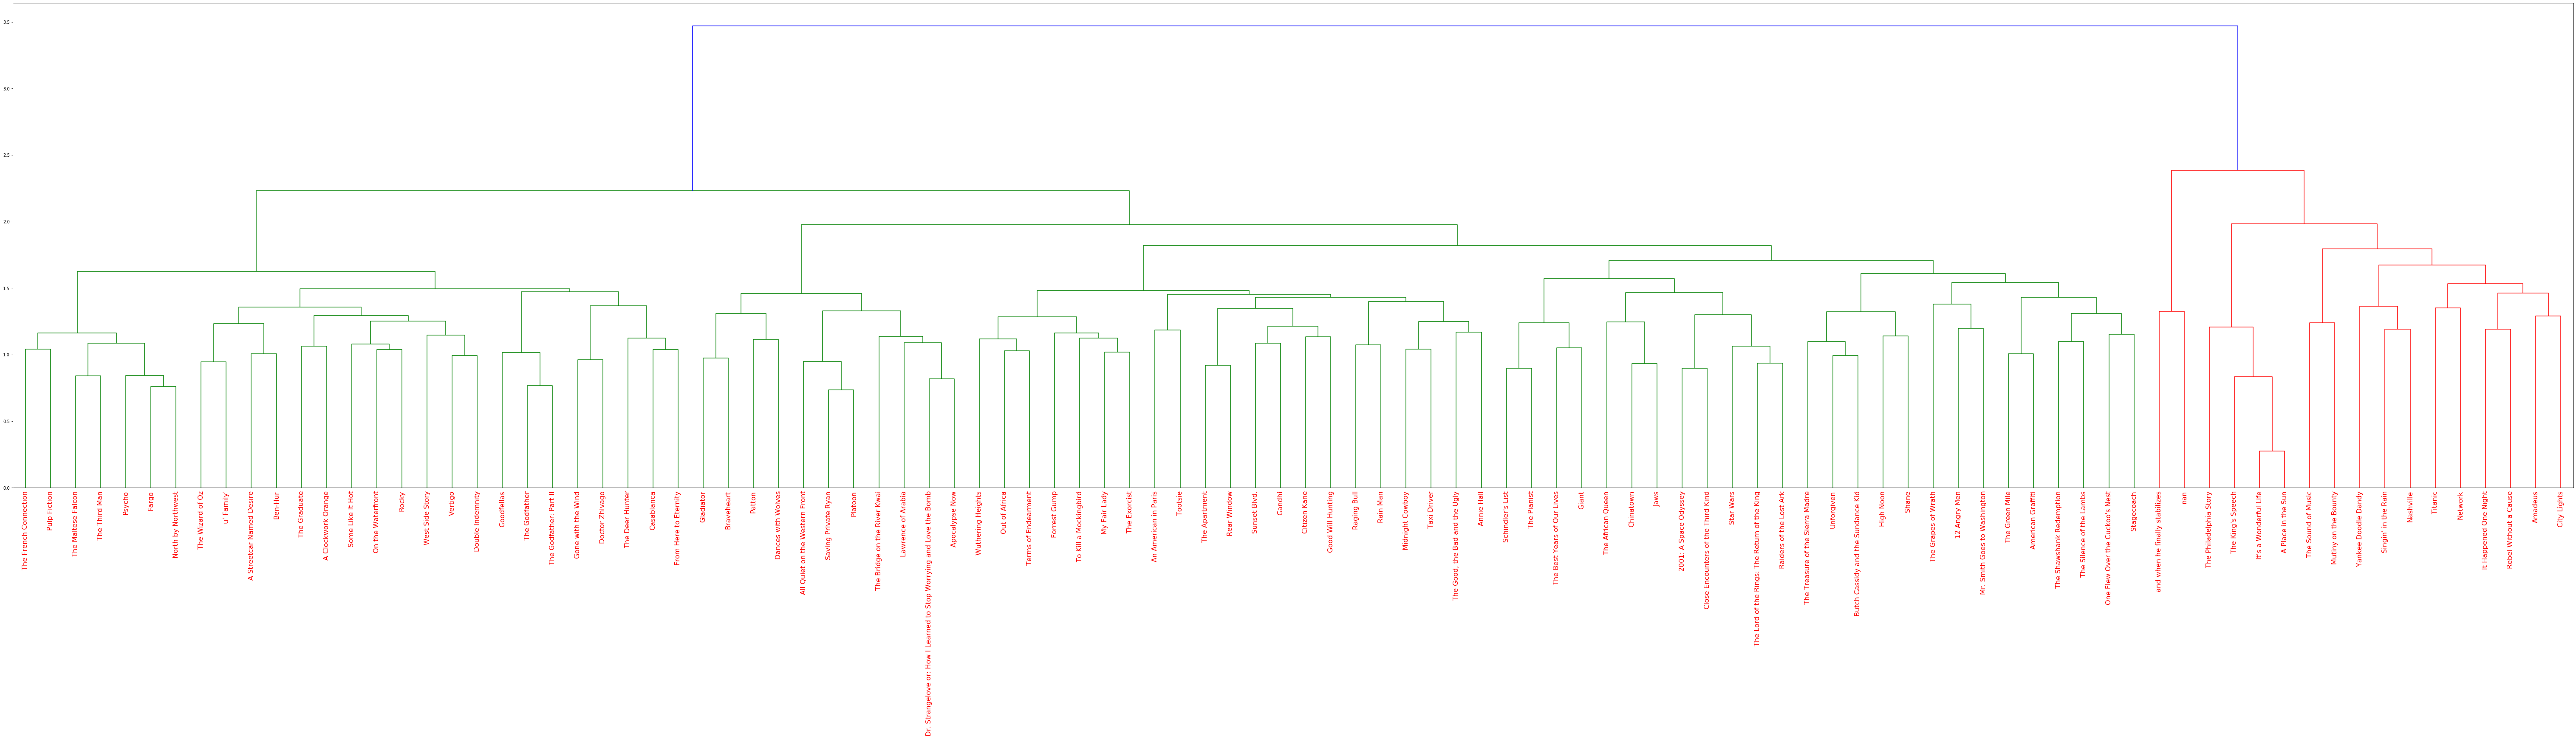

In [51]:
# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[x for x in moviesDT["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()

In [53]:
# Answer the question 
ans = "magic"
print(ans)

magic
